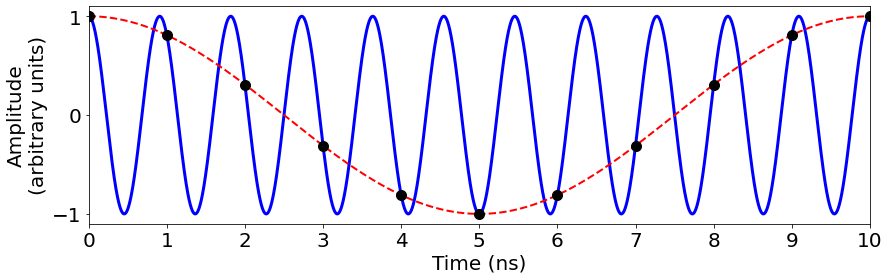

In [1]:
# Make the Nyquist plot

import numpy as np
import matplotlib.pyplot as plt

start = 0
stop = 10
t = np.linspace(start, stop , 10000)
hf = 1.1
lf = 0.1
delta_t =  1 / (hf - lf)
phase_hf = ( 1/lf - 1/hf ) / 4
phase_all = -1/(4*lf)
y_hf = np.sin( 2 * np.pi * hf * (t - phase_hf - phase_all) )
y_lf = np.sin( 2 * np.pi * lf * (t - phase_all)  )

N = int( np.ceil( ( stop - start ) / delta_t ) )

fig,ax = plt.subplots(1,1,figsize = [14,4])
ax.plot(t,y_hf, color = '#0000ff', linewidth = 3, linestyle = '-', zorder = 0)
ax.plot(t,y_lf, color = '#ff0000', linewidth = 2, linestyle = '--', zorder = 1)
for i in range(N+1):
    t_i = i * delta_t
    ax.plot(t_i, np.sin( 2 * np.pi * hf * (t_i - phase_hf - phase_all) ), 'o', color = 'k',markersize = 10)
    
#ax.legend(loc = "lower right", framealpha = 1)
ax.set_xticks(np.arange(start, stop + 1));
ax.set_yticks([-1,0,1]);
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Time (ns)', fontsize = 20)
ax.set_ylabel('Amplitude\n(arbitrary units)', fontsize = 20)
ax.set_xlim([start,stop])

fig.savefig("Nyquist.png",type="png",dpi=300,bbox_inches="tight")

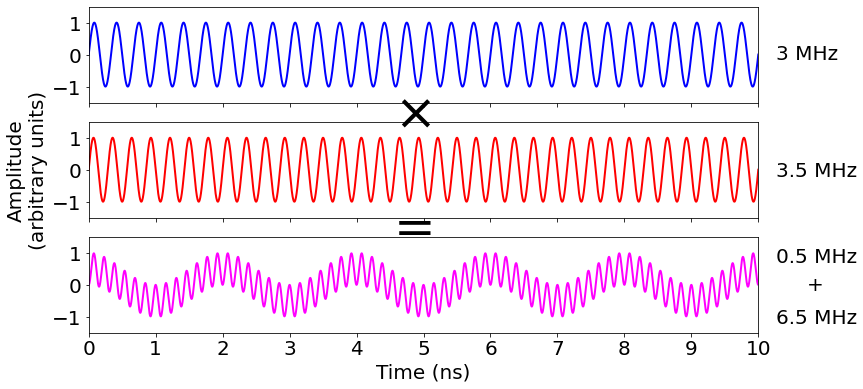

In [2]:
# Show heterodyning

# Make the Nyquist plot

import numpy as np
import matplotlib.pyplot as plt

start = 0
stop = 10
t = np.linspace(start, stop , 10000)
hf = 3.5
lf = 3
y_hf = np.sin( 2 * np.pi * hf * t )
y_lf = np.sin( 2 * np.pi * lf * t )

N = int( np.ceil( ( stop - start ) / delta_t ) )

fig,ax = plt.subplots(3,1,figsize = [12,6],sharex=True)
#plt.subplots_adjust(hspace=0)
ax[0].plot(t,y_lf, color = '#0000ff', linewidth = 2, linestyle = '-')
ax[1].plot(t,y_hf, color = '#ff0000', linewidth = 2, linestyle = '-')
ax[2].plot(t,y_lf * y_hf, color = '#ff00ff', linewidth = 2, linestyle = '-')
ax[2].set_xticks(np.arange(start, stop + 1));
#ax.set_yticks([-1,0,1]);
for i in range(len(ax)):
    ax[i].tick_params(axis='both', which='major', labelsize=20)
    ax[i].set_ylim([-1.5,1.5])
    #ax[i].axis('off')
ax[2].set_xlabel('Time (ns)', fontsize = 20)
ax[1].set_ylabel('Amplitude\n(arbitrary units)', fontsize = 20)
ax[2].set_xlim([start,stop])
fig.text(0.5,0.635,r"$\times$",fontsize=50,ha='center',va='center')
fig.text(0.495,0.37,r"$=$",fontsize=50,ha='center',va='center')
#fig.text(0.92,0.9,'Frequency:',fontsize=20,ha='left',va='center')
fig.text(0.92,0.77,str(lf)+' MHz',fontsize=20,ha='left',va='center')
fig.text(0.92,0.5,str(hf)+' MHz',fontsize=20,ha='left',va='center')
fig.text(0.92,0.3,str(np.abs(lf-hf))+' MHz',fontsize=20,ha='left',va='center')
fig.text(0.955,0.235,r'$+$',fontsize=20,ha='left',va='center')
fig.text(0.92,0.16,str(hf+lf)+' MHz',fontsize=20,ha='left',va='center')

fig.savefig("Heterodyning.png",type="png",dpi=300,bbox_inches="tight")

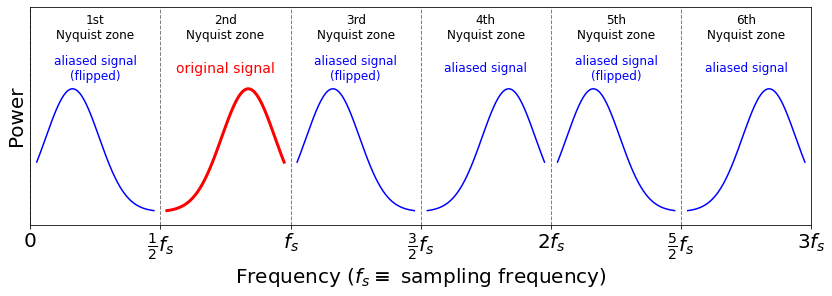

In [6]:
# Nyquist zones plot

import numpy as np
import matplotlib.pyplot as plt

start = 0
stop = 18
f_s = 20
n_zones = 5
f = np.linspace(start+1, stop+1 , 10000)
env1 = np.exp(-((f) + f**2)/100)
env2 = np.exp(-(f-10)**2/50)
y_f = env1*env2#*np.abs(np.sin(f-1))

fig,ax = plt.subplots(1,1,figsize = [14,4])
copy_props ={
    'linewidth':1.5,
    'linestyle':'-',
    'color':'#0000ff'
}

copy_text_props ={
    'ha':'center',
    'va':'center',
    'color':'#0000ff',
    'fontsize':12
}

y_min=-0.05
y_max=0.8

ax.plot(f,y_f, **copy_props)
#ax.text(0.5*f_s,0.7 * y_max,'alias (flipped)',**copy_text_props)
ax.plot(f+f_s,y_f[::-1],linewidth=3,linestyle='-',color='#ff0000')
ax.text(1.5*f_s,0.7 * y_max,'original signal',ha='center',va='center',color='#ff0000',fontsize=14)
flip = 1

nth_labels = ['1st','2nd','3rd','4th','5th','6th']

for i in range(n_zones+2):
    if i < n_zones + 1:
        if i>=1 and i < n_zones:
            ax.plot(f+(i+1)*(f_s),y_f[::flip],**copy_props)
            flip*=-1
    
        ax.text(i*f_s+f_s/2, 0.9*y_max, nth_labels[i]+'\nNyquist zone',ha='center',va='center',fontsize=12)
        if i!=1:
            ax.text(i*f_s+f_s/2,0.7 * y_max,'aliased signal'+((i+1)%2)*'\n(flipped)',**copy_text_props)
    ax.plot(np.ones(10)*i*(f_s),np.linspace(y_min,y_max,10),color='k',linestyle='--',linewidth=1,alpha=0.5)
    
#ax.legend(loc = "lower right", framealpha = 1)
x_ticks = np.arange(start, f_s*(n_zones+2),f_s)
ax.set_xticks(x_ticks);
x_tick_labels = ['0']
for i in range(x_ticks.size+2)[1:]:
    if i%2==0:
        if i==2:
            x_tick_labels.append('$f_s$')
        else:
            x_tick_labels.append(str(int(i/2)) + r'$f_s$')
    else:
        x_tick_labels.append(r'$\frac{'+str(i)+r'}{2}f_s$')
ax.set_xticklabels(x_tick_labels,fontsize=20)
ax.set_yticks([]);
ax.set_ylim([y_min,y_max])
#ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Frequency ($f_s\equiv$ sampling frequency)', fontsize = 20)
ax.set_ylabel('Power', fontsize = 20)
ax.set_xlim([0,f_s*(n_zones+1)])

fig.savefig("Nyquist_zones.png",type="png",dpi=300,bbox_inches="tight")